### STEP 2: DATA COLLECTION & UNDERSTANDING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load Dataset
# -------------------------------
DATA_PATH = "C:\\Users\\ffangonilo\\OneDrive - CENTURY PACIFIC FOOD INC\\Documents\\AIM\\superstore_final_dataset.csv"
df = pd.read_csv(
    DATA_PATH,
    encoding="latin1",
    low_memory=False
)


print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (9800, 16)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [2]:
# -------------------------------
# 2. Basic Structure & Data Types
# -------------------------------
print("\nData Types:")
display(df.dtypes.to_frame(name="dtype"))


Data Types:


,dtype
Order_ID,object
Order_Date,object
Ship_Date,object
Ship_Mode,object
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object
State,object


In [3]:
# -------------------------------
# 3. Missing Values Analysis
# -------------------------------
missing_summary = (
    df.isnull()
      .sum()
      .to_frame(name="missing_count")
      .assign(missing_pct=lambda x: x["missing_count"] / len(df) * 100)
      .sort_values("missing_pct", ascending=False)
)

print("\nMissing Values Summary:")
display(missing_summary)


Missing Values Summary:


,missing_count,missing_pct
Order_ID,0,0.0
Order_Date,0,0.0
Ship_Date,0,0.0
Ship_Mode,0,0.0
Customer_ID,0,0.0
Customer_Name,0,0.0
Segment,0,0.0
Country,0,0.0
City,0,0.0
State,0,0.0


In [4]:
# -------------------------------
# 4. Numerical Feature Summary
# -------------------------------
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

num_summary = df[num_cols].describe().T
num_summary["skewness"] = df[num_cols].skew()
num_summary["kurtosis"] = df[num_cols].kurtosis()

print("\nNumerical Features Summary:")
display(num_summary)



Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48,12.983483,304.445088


In [5]:
# -------------------------------
# 5. Categorical Feature Summary
# -------------------------------
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

cat_summary = []
for col in cat_cols:
    cat_summary.append({
        "feature": col,
        "unique_values": df[col].nunique(),
        "top_value": df[col].mode().iloc[0] if not df[col].mode().empty else None
    })

cat_summary = pd.DataFrame(cat_summary)

print("\nCategorical Features Summary:")
display(cat_summary)



Categorical Features Summary:


,feature,unique_values,top_value
0,Order_ID,4922,CA-2018-100111
1,Order_Date,1230,05/09/2017
2,Ship_Date,1326,26/09/2018
3,Ship_Mode,4,Standard Class
4,Customer_ID,793,WB-21850
5,Customer_Name,793,William Brown
6,Segment,3,Consumer
7,Country,1,United States
8,City,529,New York City
9,State,49,California


In [6]:
# -------------------------------
# 6. Outlier Detection (IQR Method)
# -------------------------------
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_summary.append({
        "feature": col,
        "outlier_count": outlier_count,
        "outlier_pct": outlier_count / len(df) * 100
    })

outlier_summary = pd.DataFrame(outlier_summary).sort_values("outlier_pct", ascending=False)

print("\nOutlier Summary (IQR Method):")
display(outlier_summary)



Outlier Summary (IQR Method):


,feature,outlier_count,outlier_pct
0,Sales,1145,11.683673


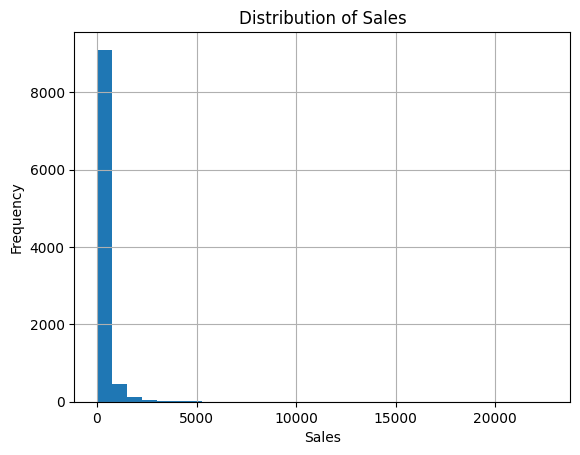

In [7]:
# -------------------------------
# 7. Distribution Plots (Numerical)
# -------------------------------
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [8]:
# -------------------------------
# 8. Data Dictionary Generation
# -------------------------------
data_dictionary = []

for col in df.columns:
    entry = {
        "variable": col,
        "data_type": str(df[col].dtype),
        "missing_pct": df[col].isnull().mean() * 100
    }

    if col in num_cols:
        entry.update({
            "min": df[col].min(),
            "max": df[col].max(),
            "mean": df[col].mean(),
            "unit_or_range": "Numeric"
        })
    else:
        entry.update({
            "min": None,
            "max": None,
            "mean": None,
            "unit_or_range": f"Categories: {df[col].nunique()}"
        })

    data_dictionary.append(entry)

data_dictionary = pd.DataFrame(data_dictionary)

print("\nData Dictionary:")
display(data_dictionary)

# Optional: save dictionary for submission
data_dictionary.to_csv("data_dictionary.csv", index=False)

print("\nStep 2 completed successfully.")


Data Dictionary:


,variable,data_type,missing_pct,min,max,mean,unit_or_range
0,Order_ID,object,0.0,NaN,NaN,NaN,Categories: 4922
1,Order_Date,object,0.0,NaN,NaN,NaN,Categories: 1230
2,Ship_Date,object,0.0,NaN,NaN,NaN,Categories: 1326
3,Ship_Mode,object,0.0,NaN,NaN,NaN,Categories: 4
4,Customer_ID,object,0.0,NaN,NaN,NaN,Categories: 793
5,Customer_Name,object,0.0,NaN,NaN,NaN,Categories: 793
6,Segment,object,0.0,NaN,NaN,NaN,Categories: 3
7,Country,object,0.0,NaN,NaN,NaN,Categories: 1
8,City,object,0.0,NaN,NaN,NaN,Categories: 529
9,State,object,0.0,NaN,NaN,NaN,Categories: 49



Step 2 completed successfully.


### STEP 3: Data Preprocessing, Applied EDA & Feature Engineering

In [9]:
# ============================================================
# (Clustering Capstone - Superstore Dataset)
# Deliverable: "EDA + Feature Engineering Report" (reproducible)
# ============================================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [10]:
# -----------------------------
# 0. Load dataset
# -----------------------------
df_raw = pd.read_csv(
    DATA_PATH,
    encoding="latin1",
    low_memory=False
)


print("Raw shape:", df_raw.shape)
display(df_raw.head())

Raw shape: (9800, 16)


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [11]:
# -----------------------------
# 1. Basic Cleaning: nulls, duplicates, types
# -----------------------------
df = df_raw.copy()

# 1.1 Standardize column names (optional but helpful)
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

# 1.2 Duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates()

# 1.3 Missing values
missing = df.isnull().mean().sort_values(ascending=False) * 100
print("\nMissing % (top):")
display(missing.head(15))

# Simple missing handling:
# - For categorical: fill with "Unknown"
# - For numeric: fill with median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

for c in cat_cols:
    df[c] = df[c].fillna("Unknown")

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# 1.4 Parse dates if present
date_candidates = [c for c in df.columns if "date" in c.lower()]
for c in date_candidates:
    try:
        df[c] = pd.to_datetime(df[c])
    except Exception:
        pass

print("\nCleaned shape:", df.shape)


Duplicate rows: 1

Missing % (top):


Order_ID         0.0
Order_Date       0.0
Ship_Date        0.0
Ship_Mode        0.0
Customer_ID      0.0
Customer_Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Region           0.0
Product_ID       0.0
Category         0.0
Sub_Category     0.0
Product_Name     0.0
dtype: float64


Cleaned shape: (9799, 16)


In [12]:
# -----------------------------
# 2. Domain Feature Engineering (Customer-level)
# -----------------------------
# Goal: clustering customers, so we aggregate transactions -> customer features.
# We'll try common Superstore-style columns, but keep it robust.

def find_col(possible_names):
    existing = set(df.columns)
    for name in possible_names:
        if name in existing:
            return name
    return None

COL_CUSTOMER_ID = find_col(["Customer_ID", "CustomerID", "Customer_Id"])
COL_CUSTOMER_NAME = find_col(["Customer_Name", "CustomerName"])
COL_ORDER_ID = find_col(["Order_ID", "OrderID"])
COL_ORDER_DATE = find_col(["Order_Date", "OrderDate"])
COL_SALES = find_col(["Sales", "sales"])
COL_PROFIT = find_col(["Profit", "profit"])
COL_DISCOUNT = find_col(["Discount", "discount"])
COL_QUANTITY = find_col(["Quantity", "quantity"])
COL_CATEGORY = find_col(["Category", "category"])
COL_SUBCATEGORY = find_col(["Sub_Category", "Sub-Category", "SubCategory", "sub_category"])
COL_REGION = find_col(["Region", "region"])
COL_SEGMENT = find_col(["Segment", "segment"])

if COL_CUSTOMER_ID is None:
    raise ValueError("Customer_ID column not found. Please check your CSV column names.")

# Base table for aggregation
work = df.copy()

# If no order date, create a dummy date index for recency-like fields
if COL_ORDER_DATE is None or not np.issubdtype(work[COL_ORDER_DATE].dtype, np.datetime64):
    print("Order_Date not found or not parsed as datetime. Recency features will be skipped.")
    use_recency = False
else:
    use_recency = True
    max_date = work[COL_ORDER_DATE].max()

# --- Customer aggregates
agg_dict = {}

# Behavioral/value
if COL_SALES:    agg_dict[COL_SALES] = ["sum", "mean", "median", "std"]
if COL_PROFIT:   agg_dict[COL_PROFIT] = ["sum", "mean", "median", "std"]
if COL_DISCOUNT: agg_dict[COL_DISCOUNT] = ["mean", "max", "std"]
if COL_QUANTITY: agg_dict[COL_QUANTITY] = ["sum", "mean", "max"]

# Order frequency proxies
if COL_ORDER_ID:
    order_counts = work.groupby(COL_CUSTOMER_ID)[COL_ORDER_ID].nunique().rename("n_orders")
else:
    # fallback: number of rows per customer
    order_counts = work.groupby(COL_CUSTOMER_ID).size().rename("n_orders")

cust = work.groupby(COL_CUSTOMER_ID).agg(agg_dict)
cust.columns = ["__".join(map(str, c)).strip() for c in cust.columns.to_flat_index()]
cust = cust.reset_index()

cust = cust.merge(order_counts.reset_index(), on=COL_CUSTOMER_ID, how="left")

# Recency: days since last purchase
if use_recency:
    last_order = work.groupby(COL_CUSTOMER_ID)[COL_ORDER_DATE].max()
    recency_days = (max_date - last_order).dt.days.rename("recency_days")
    cust = cust.merge(recency_days.reset_index(), on=COL_CUSTOMER_ID, how="left")

# Category diversity: how broad is the basket?
if COL_CATEGORY:
    cat_div = work.groupby(COL_CUSTOMER_ID)[COL_CATEGORY].nunique().rename("category_diversity")
    cust = cust.merge(cat_div.reset_index(), on=COL_CUSTOMER_ID, how="left")

if COL_SUBCATEGORY:
    subcat_div = work.groupby(COL_CUSTOMER_ID)[COL_SUBCATEGORY].nunique().rename("subcat_diversity")
    cust = cust.merge(subcat_div.reset_index(), on=COL_CUSTOMER_ID, how="left")

# Promo intensity / discount dependency (simple but useful)
if COL_DISCOUNT and COL_SALES:
    # share of sales with discount > 0
    disc_sales = work.assign(_disc_flag=(work[COL_DISCOUNT] > 0).astype(int))
    disc_share = (
        disc_sales.groupby(COL_CUSTOMER_ID)
        .apply(lambda g: np.average(g["_disc_flag"], weights=g[COL_SALES]) if g[COL_SALES].sum() > 0 else g["_disc_flag"].mean())
        .rename("discount_sales_weighted_share")
    )
    cust = cust.merge(disc_share.reset_index(), on=COL_CUSTOMER_ID, how="left")

# Add stable customer metadata if present (mode)
def mode_safe(s):
    m = s.mode()
    return m.iloc[0] if len(m) else "Unknown"

meta_cols = [c for c in [COL_SEGMENT, COL_REGION] if c is not None]
for mc in meta_cols:
    meta = work.groupby(COL_CUSTOMER_ID)[mc].apply(mode_safe).rename(mc)
    cust = cust.merge(meta.reset_index(), on=COL_CUSTOMER_ID, how="left")

print("\nCustomer-level feature matrix shape:", cust.shape)
display(cust.head())

Order_Date not found or not parsed as datetime. Recency features will be skipped.

Customer-level feature matrix shape: (793, 10)


,Customer_ID,Sales__sum,Sales__mean,Sales__median,Sales__std,n_orders,category_diversity,subcat_diversity,Segment,Region
0,AA-10315,5563.560,505.778182,41.720,1157.990034,5,3,9,Consumer,Central
1,AA-10375,1056.390,70.426000,17.940,126.508857,9,3,7,Consumer,East
2,AA-10480,1790.512,149.209333,39.650,176.229194,4,3,7,Consumer,Central
3,AA-10645,5086.935,282.607500,94.551,429.222188,6,3,9,Consumer,East
4,AB-10015,886.156,147.692667,135.346,139.432371,3,3,5,Consumer,Central



Customer numeric features: ['Sales__sum', 'Sales__mean', 'Sales__median', 'Sales__std', 'n_orders', 'category_diversity', 'subcat_diversity']
Customer categorical features: ['Customer_ID', 'Segment', 'Region']


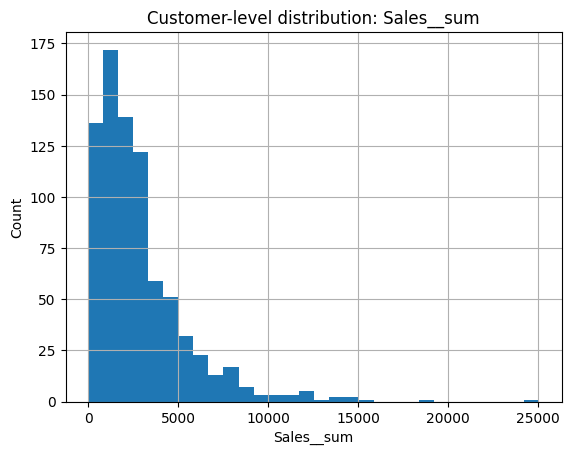

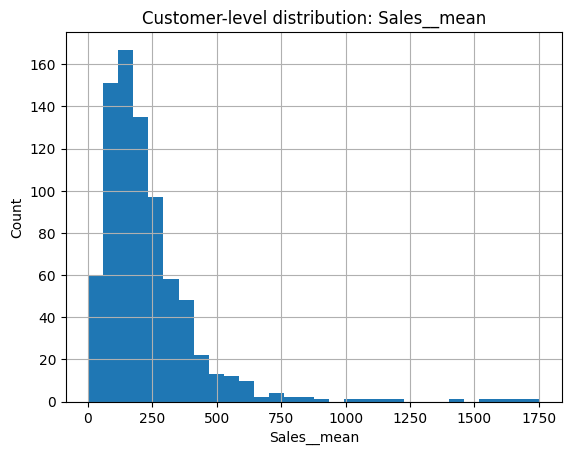

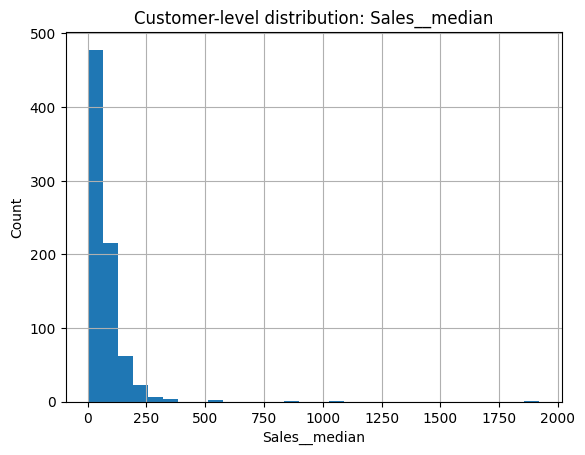

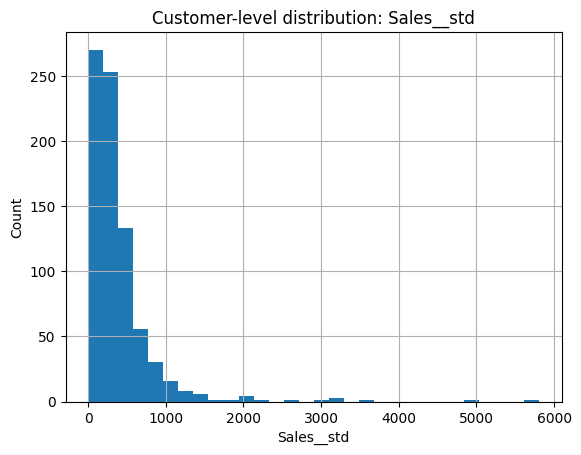

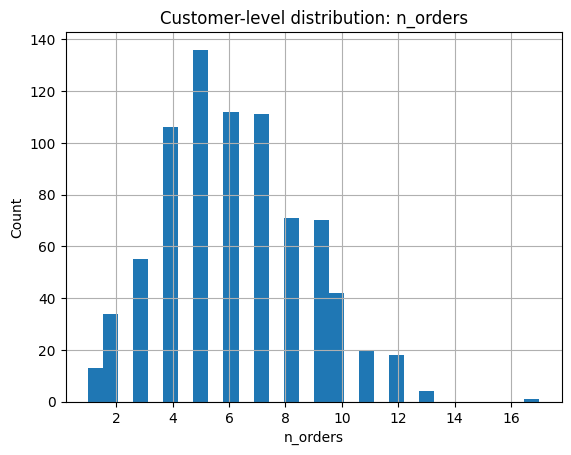

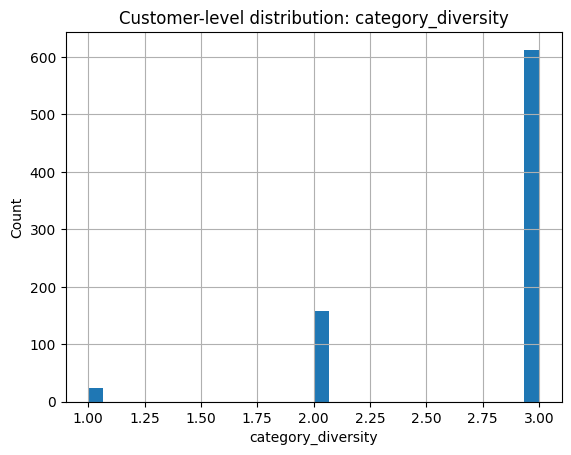

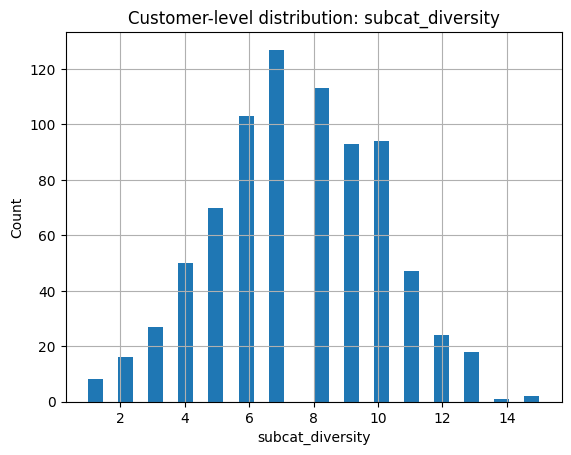

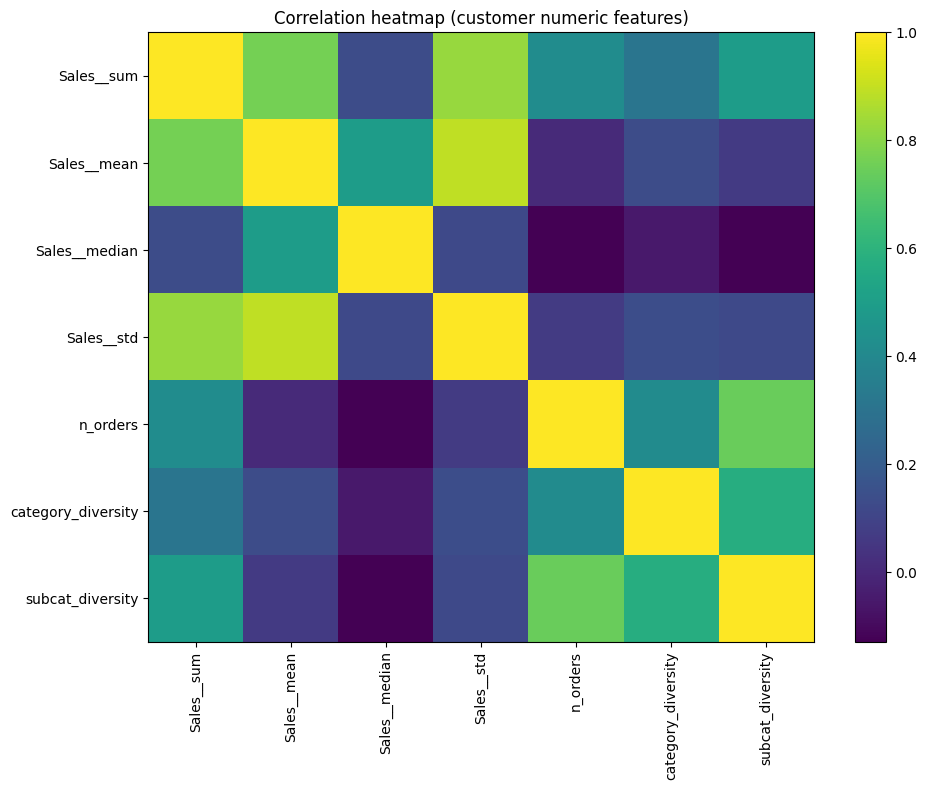


Hopkins statistic (numeric-only, scaled): 0.946
Interpretation: ~0.5 indicates randomness; closer to 1 suggests strong cluster tendency.


In [13]:
# -----------------------------
# 3. Applied EDA (Customer-level)
#    - distributions
#    - correlations
#    - clustering tendency (Hopkins)
# -----------------------------
# 3.1 Identify numeric/categorical cols in customer table
cust_num = cust.select_dtypes(include=["int64", "float64"]).columns.tolist()
cust_cat = cust.select_dtypes(include=["object"]).columns.tolist()
# Drop ID from numeric if it got inferred (rare), and keep ID separately
if COL_CUSTOMER_ID in cust_num:
    cust_num.remove(COL_CUSTOMER_ID)

print("\nCustomer numeric features:", cust_num)
print("Customer categorical features:", cust_cat)

# 3.2 Distribution plots (numeric)
for col in cust_num:
    plt.figure()
    cust[col].hist(bins=30)
    plt.title(f"Customer-level distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 3.3 Correlation heatmap (numeric)
if len(cust_num) >= 2:
    corr = cust[cust_num].corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, aspect="auto")
    plt.title("Correlation heatmap (customer numeric features)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# 3.4 Clustering tendency: Hopkins statistic (0.5 ~ random, closer to 1 indicates clusters)
def hopkins_statistic(X, m=200, random_state=42):
    """
    Hopkins statistic for clustering tendency.
    X: numpy array (n_samples, n_features), assumed scaled/continuous.
    m: number of samples to use (<= n_samples).
    """
    rng = np.random.default_rng(random_state)
    n = X.shape[0]
    m = min(m, n)

    # sample m points from X
    idx = rng.choice(n, size=m, replace=False)
    X_m = X[idx]

    # generate m random points within min-max of each feature
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    U = rng.uniform(mins, maxs, size=(m, X.shape[1]))

    # distances to nearest neighbor (excluding self)
    dist_X = pairwise_distances(X_m, X)
    # set self-distance to inf by matching indices
    for i, original_idx in enumerate(idx):
        dist_X[i, original_idx] = np.inf
    w = np.min(dist_X, axis=1)

    dist_U = pairwise_distances(U, X)
    u = np.min(dist_U, axis=1)

    H = u.sum() / (u.sum() + w.sum())
    return float(H)

# For Hopkins we need a numeric matrix; we'll build a simple scaled numeric-only view
X_for_hopkins = cust[cust_num].copy()
X_for_hopkins = X_for_hopkins.replace([np.inf, -np.inf], np.nan).fillna(0)
X_for_hopkins = StandardScaler().fit_transform(X_for_hopkins)

H = hopkins_statistic(X_for_hopkins, m=200, random_state=42)
print(f"\nHopkins statistic (numeric-only, scaled): {H:.3f}")
print("Interpretation: ~0.5 indicates randomness; closer to 1 suggests strong cluster tendency.")


In [14]:
# -----------------------------
# 4. Outlier Handling (Customer-level)
#    - winsorize numeric features using IQR caps
# -----------------------------
cust_fe = cust.copy()

def iqr_cap_series(s, factor=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lo = q1 - factor * iqr
    hi = q3 + factor * iqr
    return s.clip(lower=lo, upper=hi), lo, hi

outlier_caps = []
for col in cust_num:
    capped, lo, hi = iqr_cap_series(cust_fe[col], factor=1.5)
    n_capped = (capped != cust_fe[col]).sum()
    outlier_caps.append({"feature": col, "n_capped": int(n_capped), "cap_low": float(lo), "cap_high": float(hi)})
    cust_fe[col] = capped

outlier_caps = pd.DataFrame(outlier_caps).sort_values("n_capped", ascending=False)
print("\nOutlier capping summary (IQR caps):")
display(outlier_caps)


Outlier capping summary (IQR caps):


,feature,n_capped,cap_low,cap_high
5,category_diversity,180,3.000000,3.000000
3,Sales__std,63,-284.602451,890.016856
2,Sales__median,54,-48.210000,173.950000
0,Sales__sum,46,-2801.722000,7553.446000
1,Sales__mean,42,-134.143750,532.658250
6,subcat_diversity,11,1.500000,13.500000
4,n_orders,1,-2.000000,14.000000


In [15]:
# -----------------------------
# 5. Feature Engineering (Scaling, Encoding, Binning)
# -----------------------------
# Example binning (domain-ish): recency buckets if recency exists
if "recency_days" in cust_fe.columns:
    cust_fe["recency_bucket"] = pd.cut(
        cust_fe["recency_days"],
        bins=[-np.inf, 30, 90, 180, 365, np.inf],
        labels=["<=30d", "31-90d", "91-180d", "181-365d", ">365d"]
    ).astype(str)

# Another binning example: discount dependency bucket
if "discount_sales_weighted_share" in cust_fe.columns:
    cust_fe["discount_dependency_bucket"] = pd.cut(
        cust_fe["discount_sales_weighted_share"],
        bins=[-np.inf, 0.0, 0.2, 0.5, 0.8, np.inf],
        labels=["none", "low", "medium", "high", "extreme"]
    ).astype(str)

# Update categorical list after bins
cust_cat = cust_fe.select_dtypes(include=["object"]).columns.tolist()

# Keep ID aside
id_series = cust_fe[COL_CUSTOMER_ID].copy()
X = cust_fe.drop(columns=[COL_CUSTOMER_ID], errors="ignore")

# Define numeric & categorical columns for modeling
model_num = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
model_cat = X.select_dtypes(include=["object"]).columns.tolist()

print("\nModel numeric cols:", model_num)
print("Model categorical cols:", model_cat)



Model numeric cols: ['Sales__sum', 'Sales__mean', 'Sales__median', 'Sales__std', 'n_orders', 'category_diversity', 'subcat_diversity']
Model categorical cols: ['Segment', 'Region']


In [16]:
# -----------------------------
# 6. Feature Selection (Filter method)
#    - remove near-zero variance features
#    - remove one of highly correlated pairs (after preprocessing)
# -----------------------------
# Preprocess: scale numeric + one-hot encode categorical
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, model_num),
        ("cat", categorical_transformer, model_cat)
    ],
    remainder="drop"
)

X_pre = preprocess.fit_transform(X)

# Get feature names after preprocessing
# (works for sklearn >= 1.0)
num_names = model_num
cat_ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
cat_names = cat_ohe.get_feature_names_out(model_cat).tolist()
feature_names = num_names + cat_names

X_pre_df = pd.DataFrame(X_pre, columns=feature_names)

# 6.1 Variance threshold
vt = VarianceThreshold(threshold=1e-6)
X_vt = vt.fit_transform(X_pre_df)
kept_mask = vt.get_support()
kept_features = X_pre_df.columns[kept_mask].tolist()

X_vt_df = pd.DataFrame(X_vt, columns=kept_features)

print("\nFeature selection (VarianceThreshold):")
print("Original features:", X_pre_df.shape[1])
print("Kept features:", X_vt_df.shape[1])

# 6.2 Correlation filter (remove one of each highly correlated pair)
# NOTE: With one-hot features, correlations can happen; we’ll filter carefully.
def correlation_filter(df_in, threshold=0.95):
    corr = df_in.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [c for c in upper.columns if any(upper[c] > threshold)]
    df_out = df_in.drop(columns=to_drop)
    return df_out, to_drop

X_fs_df, dropped_corr = correlation_filter(X_vt_df, threshold=0.95)
print("\nFeature selection (Correlation filter):")
print("Dropped due to high corr:", len(dropped_corr))
print("Final selected features:", X_fs_df.shape[1])



Feature selection (VarianceThreshold):
Original features: 14
Kept features: 13

Feature selection (Correlation filter):
Dropped due to high corr: 0
Final selected features: 13


In [17]:
# -----------------------------
# FINAL NaN SAFETY CHECK (before PCA)
# -----------------------------
print("NaN count before PCA:", X_fs_df.isnull().sum().sum())

# Median imputation (robust, clustering-safe)
X_fs_df = X_fs_df.fillna(X_fs_df.median())

print("NaN count after PCA-impute:", X_fs_df.isnull().sum().sum())


NaN count before PCA: 6
NaN count after PCA-impute: 0


In [18]:
# -----------------------------
# 7. Dimensionality Reduction
#    - PCA for modeling + explained variance
#    - t-SNE for visualization (optional)
# -----------------------------
# 7.1 PCA
pca = PCA(n_components=0.90, random_state=42)  # keep enough PCs to explain 90% variance
X_pca = pca.fit_transform(X_fs_df)

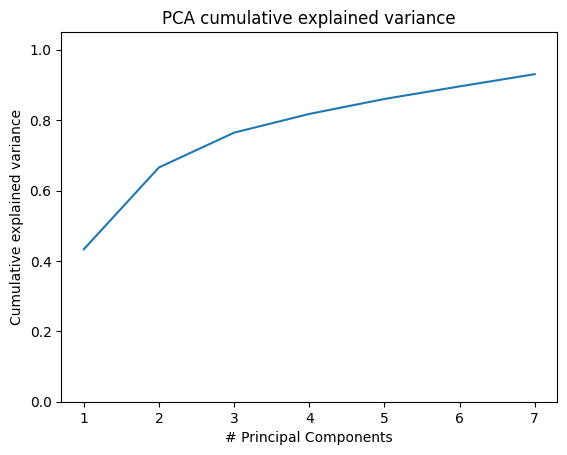


PCA components kept: 7
Cumulative explained variance: 0.9305085829226846


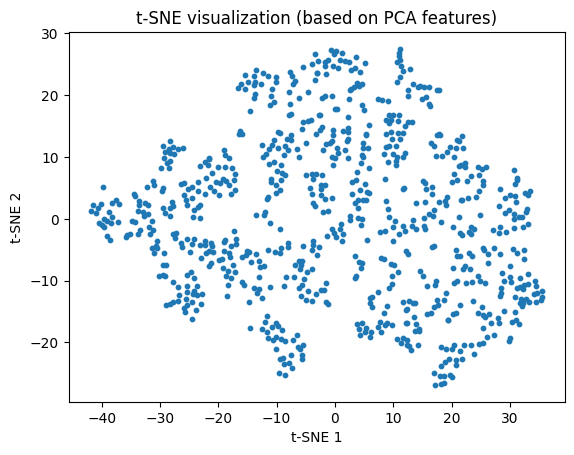

In [19]:

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.figure()
plt.plot(range(1, len(cum_explained) + 1), cum_explained)
plt.title("PCA cumulative explained variance")
plt.xlabel("# Principal Components")
plt.ylabel("Cumulative explained variance")
plt.ylim(0, 1.05)
plt.show()

print("\nPCA components kept:", X_pca.shape[1])
print("Cumulative explained variance:", float(cum_explained[-1]))

# 7.2 t-SNE visualization (on PCA-reduced data for speed)
# Tip: t-SNE is for visualization; not used as a modeling transform.
tsne = TSNE(n_components=2, perplexity=30, learning_rate="auto", init="pca", random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
plt.title("t-SNE visualization (based on PCA features)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()



Top surrogate feature importances (Permutation Importance):


,feature,importance_mean,importance_std
0,Sales__sum,0.126103,0.006553
1,Sales__mean,0.075284,0.005469
2,Sales__median,0.013997,0.002550
3,Sales__std,0.012736,0.002845
4,n_orders,0.002270,0.000944
5,subcat_diversity,0.001892,0.001017
6,Segment_Consumer,0.000000,0.000000
7,Segment_Corporate,0.000000,0.000000
8,Segment_Home Office,0.000000,0.000000
9,Region_Central,0.000000,0.000000


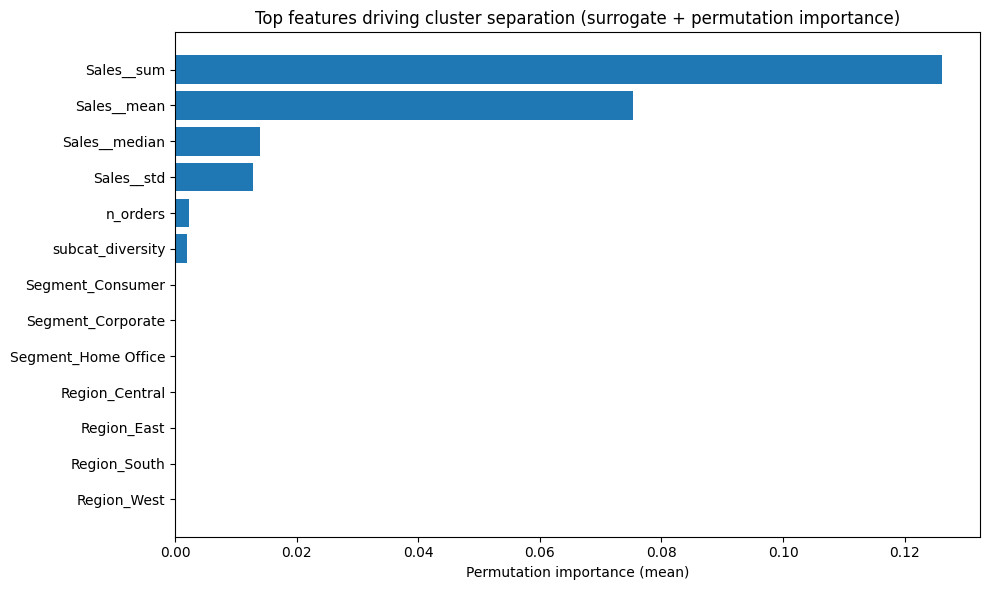


SHAP not available or failed to run in this environment.
Reason: The shape of the shap_values matrix does not match the shape of the provided data matrix.
Permutation importance above is the required explainability artifact.


<Figure size 640x480 with 0 Axes>

In [34]:
# -----------------------------
# 8. "Feature Importance / Explainability" for Unsupervised
#    Approach: build clusters -> train a surrogate classifier -> importances/SHAP
# -----------------------------
# 8.1 Create provisional clusters (KMeans on PCA space)
# (Final model choice belongs to Step 4, but this enables explainability here.)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(X_pca)

# 8.2 Surrogate model: predict cluster labels from engineered features
rf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
rf.fit(X_fs_df, cluster_labels)

# Permutation importance for global interpretability
perm = permutation_importance(
    rf, X_fs_df, cluster_labels,
    n_repeats=10, random_state=42, n_jobs=-1
)

imp = pd.DataFrame({
    "feature": X_fs_df.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("\nTop surrogate feature importances (Permutation Importance):")
display(imp.head(20))

plt.figure(figsize=(10, 6))
topn = 15
plt.barh(imp.head(topn)["feature"][::-1], imp.head(topn)["importance_mean"][::-1])
plt.title("Top features driving cluster separation (surrogate + permutation importance)")
plt.xlabel("Permutation importance (mean)")
plt.tight_layout()
plt.show()

# Optional SHAP (if installed)
try:
    import shap
    shap.initjs()

    # Use TreeExplainer for RF; explain a sample for speed
    sample_idx = np.random.default_rng(42).choice(len(X_fs_df), size=min(800, len(X_fs_df)), replace=False)
    X_sample = X_fs_df.iloc[sample_idx]

    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_sample)

    # Summary plot (for multiclass, shap_values is a list)
    # We'll show for class 0 as a representative (you can loop over classes)
    plt.figure()
    shap.summary_plot(shap_values[0], X_sample, show=False)
    plt.title("SHAP summary (class 0 vs rest, surrogate model)")
    plt.show()

except Exception as e:
    print("\nSHAP not available or failed to run in this environment.")
    print("Reason:", str(e))
    print("Permutation importance above is the required explainability artifact.")


In [35]:
# -----------------------------
# 9. Save artifacts for reproducibility
# -----------------------------
# Save customer features, preprocessed matrix, PCA matrix, and cluster labels (provisional)
cust_out = cust_fe.copy()
cust_out["cluster_provisional_kmeans"] = cluster_labels
cust_out.to_csv("customer_features_with_provisional_clusters.csv", index=False)

X_fs_df.to_csv("X_preprocessed_selected.csv", index=False)
pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]).to_csv("X_pca.csv", index=False)
imp.to_csv("surrogate_feature_importance.csv", index=False)

print("\nSaved files:")
print(" - customer_features_with_provisional_clusters.csv")
print(" - X_preprocessed_selected.csv")
print(" - X_pca.csv")
print(" - surrogate_feature_importance.csv")

print("\nStep 3 completed successfully.")


Saved files:
 - customer_features_with_provisional_clusters.csv
 - X_preprocessed_selected.csv
 - X_pca.csv
 - surrogate_feature_importance.csv

Step 3 completed successfully.


### STEP 4: MODEL IMPLEMENTATION (Unsupervised Clustering)

In [36]:
# ============================================================
# Models: KMeans, Agglomerative, DBSCAN
# Metrics: Silhouette, Davies-Bouldin, Calinski-Harabasz
# Reproducibility: save configs + artifacts
# ============================================================

import json
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.utils import resample

RANDOM_STATE = 42

In [37]:
# -----------------------------
# 0. Load PCA features
# -----------------------------
X_pca = pd.read_csv("X_pca.csv")
X = X_pca.values

print("X shape:", X.shape)
display(X_pca.head())

X shape: (793, 7)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.841276,-0.905155,-1.816777,0.827715,0.034615,0.306673,-0.996432
1,-1.429456,1.515372,-0.173027,0.524334,0.578862,0.370399,0.950241
2,-1.279013,-0.077314,-0.325373,0.647779,-0.059570,0.346679,-0.914749
3,1.357013,-0.132751,0.285130,0.690816,0.770213,-0.459503,-0.103400
4,-1.433386,-1.592134,1.383072,0.517623,-0.142965,0.516999,-0.667115


In [38]:
# Output folders (simple)
ARTIFACT_DIR = "step4_artifacts"
import os
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# -----------------------------
# Helper: evaluate clustering
# -----------------------------
def evaluate_clustering(X, labels):
    """Compute internal metrics. Returns dict. Handles edge cases."""
    # Need at least 2 clusters and no all-noise for silhouette etc.
    unique = set(labels)
    # For DBSCAN, -1 is noise; exclude only-noise case
    n_clusters = len([u for u in unique if u != -1])

    out = {
        "n_clusters": n_clusters,
        "noise_pct": float(np.mean(labels == -1) * 100.0) if -1 in unique else 0.0,
        "silhouette": None,
        "davies_bouldin": None,
        "calinski_harabasz": None
    }

    # Metrics only valid when there are >=2 clusters and not all same label
    if n_clusters >= 2:
        # For DBSCAN, silhouette should ignore noise points
        if -1 in unique:
            mask = labels != -1
            if mask.sum() >= 2 and len(set(labels[mask])) >= 2:
                out["silhouette"] = float(silhouette_score(X[mask], labels[mask]))
                out["davies_bouldin"] = float(davies_bouldin_score(X[mask], labels[mask]))
                out["calinski_harabasz"] = float(calinski_harabasz_score(X[mask], labels[mask]))
        else:
            out["silhouette"] = float(silhouette_score(X, labels))
            out["davies_bouldin"] = float(davies_bouldin_score(X, labels))
            out["calinski_harabasz"] = float(calinski_harabasz_score(X, labels))

    return out

# -----------------------------
# Helper: stability via resampling (KMeans/Agglo only)
# -----------------------------
def stability_score_kmeans_like(X, model_builder, n_boot=10, sample_frac=0.8, random_state=42):
    """
    Proxy stability measure: compare cluster center assignments consistency
    across bootstrap samples by comparing silhouette variability.
    (Simple and report-friendly.)
    """
    rng = np.random.default_rng(random_state)
    sils = []

    for i in range(n_boot):
        idx = rng.choice(len(X), size=int(len(X) * sample_frac), replace=True)
        Xb = X[idx]
        model = model_builder()
        labels = model.fit_predict(Xb)
        ev = evaluate_clustering(Xb, labels)
        sils.append(ev["silhouette"] if ev["silhouette"] is not None else np.nan)

    sils = np.array(sils, dtype=float)
    return {
        "silhouette_mean": float(np.nanmean(sils)),
        "silhouette_std": float(np.nanstd(sils))
    }


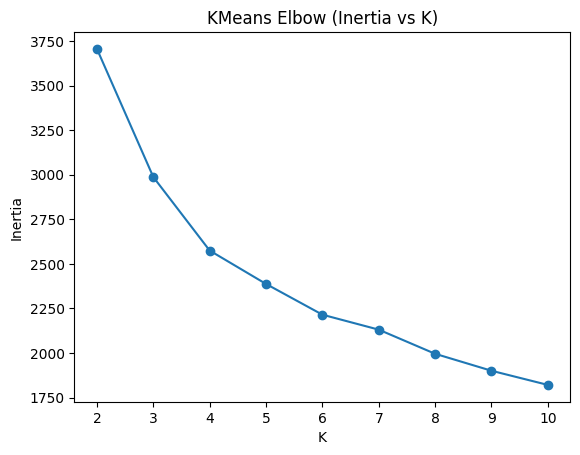

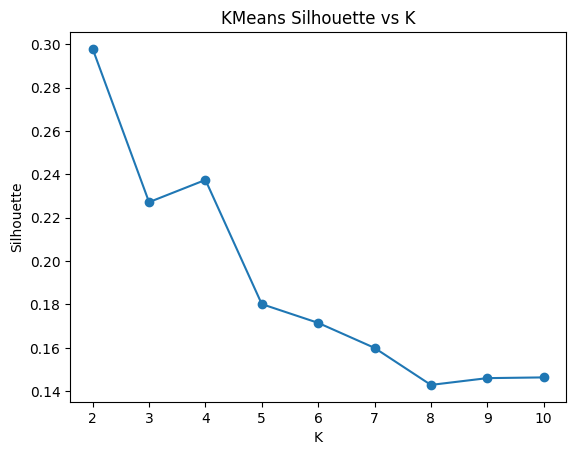

,n_clusters,noise_pct,silhouette,davies_bouldin,calinski_harabasz,model,k
0,2,0.0,0.297897,1.375186,363.987352,kmeans,2
2,4,0.0,0.237460,1.316072,289.768940,kmeans,4
1,3,0.0,0.227204,1.402835,320.543713,kmeans,3
3,5,0.0,0.180166,1.585689,249.540322,kmeans,5
4,6,0.0,0.171503,1.511492,227.160771,kmeans,6
5,7,0.0,0.159963,1.632895,201.675105,kmeans,7
8,10,0.0,0.146345,1.662400,171.559137,kmeans,10
7,9,0.0,0.146010,1.646543,181.069743,kmeans,9
6,8,0.0,0.142876,1.724326,191.968485,kmeans,8


In [39]:
# ============================================================
# 1) KMEANS: Tune K using elbow + silhouette
# ============================================================
k_range = range(2, 11)
kmeans_rows = []
inertias = []
silhouettes = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
    labels = model.fit_predict(X)

    inertias.append(model.inertia_)
    ev = evaluate_clustering(X, labels)
    ev.update({"model": "kmeans", "k": k})
    kmeans_rows.append(ev)

    silhouettes.append(ev["silhouette"])

kmeans_results = pd.DataFrame(kmeans_rows)
kmeans_results.to_csv(os.path.join(ARTIFACT_DIR, "kmeans_tuning_metrics.csv"), index=False)

# Plot elbow
plt.figure()
plt.plot(list(k_range), inertias, marker="o")
plt.title("KMeans Elbow (Inertia vs K)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# Plot silhouette
plt.figure()
plt.plot(list(k_range), silhouettes, marker="o")
plt.title("KMeans Silhouette vs K")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()

display(kmeans_results.sort_values("silhouette", ascending=False).head(10))

# Choose best K by silhouette (you can override for business interpretability)
best_k = int(kmeans_results.sort_values("silhouette", ascending=False).iloc[0]["k"])
best_kmeans = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init="auto")
kmeans_labels = best_kmeans.fit_predict(X)

kmeans_eval = evaluate_clustering(X, kmeans_labels)
kmeans_stab = stability_score_kmeans_like(
    X,
    model_builder=lambda: KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init="auto"),
    n_boot=15
)

# Save artifacts
joblib.dump(best_kmeans, os.path.join(ARTIFACT_DIR, f"kmeans_model_k{best_k}.joblib"))
np.save(os.path.join(ARTIFACT_DIR, f"kmeans_labels_k{best_k}.npy"), kmeans_labels)

with open(os.path.join(ARTIFACT_DIR, f"kmeans_config_k{best_k}.json"), "w") as f:
    json.dump({"model": "kmeans", "k": best_k, "random_state": RANDOM_STATE}, f, indent=2)

with open(os.path.join(ARTIFACT_DIR, f"kmeans_eval_k{best_k}.json"), "w") as f:
    json.dump({"eval": kmeans_eval, "stability": kmeans_stab}, f, indent=2)


In [40]:
# ============================================================
# 2) AGGLOMERATIVE: Tune number of clusters
# ============================================================
agg_range = range(2, 11)
agg_rows = []

# Ward linkage works well with Euclidean space (PCA)
for k in agg_range:
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = model.fit_predict(X)
    ev = evaluate_clustering(X, labels)
    ev.update({"model": "agglomerative", "k": k, "linkage": "ward"})
    agg_rows.append(ev)

agg_results = pd.DataFrame(agg_rows)
agg_results.to_csv(os.path.join(ARTIFACT_DIR, "agg_tuning_metrics.csv"), index=False)

display(agg_results.sort_values("silhouette", ascending=False).head(10))

best_k_agg = int(agg_results.sort_values("silhouette", ascending=False).iloc[0]["k"])
best_agg = AgglomerativeClustering(n_clusters=best_k_agg, linkage="ward")
agg_labels = best_agg.fit_predict(X)

agg_eval = evaluate_clustering(X, agg_labels)
# Stability proxy (re-fit on resamples)
agg_stab = stability_score_kmeans_like(
    X,
    model_builder=lambda: AgglomerativeClustering(n_clusters=best_k_agg, linkage="ward"),
    n_boot=15
)

np.save(os.path.join(ARTIFACT_DIR, f"agg_labels_k{best_k_agg}.npy"), agg_labels)
with open(os.path.join(ARTIFACT_DIR, f"agg_config_k{best_k_agg}.json"), "w") as f:
    json.dump({"model": "agglomerative", "k": best_k_agg, "linkage": "ward"}, f, indent=2)
with open(os.path.join(ARTIFACT_DIR, f"agg_eval_k{best_k_agg}.json"), "w") as f:
    json.dump({"eval": agg_eval, "stability": agg_stab}, f, indent=2)


,n_clusters,noise_pct,silhouette,davies_bouldin,calinski_harabasz,model,k,linkage
0,2,0.0,0.198969,1.801444,223.760970,agglomerative,2,ward
4,6,0.0,0.165297,1.573880,177.125173,agglomerative,6,ward
2,4,0.0,0.161357,1.559776,216.673248,agglomerative,4,ward
3,5,0.0,0.156638,1.634026,191.846673,agglomerative,5,ward
1,3,0.0,0.140633,1.633074,202.854993,agglomerative,3,ward
5,7,0.0,0.127110,1.704839,169.426173,agglomerative,7,ward
6,8,0.0,0.126710,1.567400,159.885146,agglomerative,8,ward
8,10,0.0,0.126372,1.611370,146.461488,agglomerative,10,ward
7,9,0.0,0.124566,1.549224,153.100644,agglomerative,9,ward


In [41]:
# ============================================================
# 3) DBSCAN: Tune eps and min_samples
# ============================================================
eps_grid = [0.5, 0.8, 1.0, 1.2, 1.5]
min_samples_grid = [5, 10, 20]

db_rows = []

for eps in eps_grid:
    for ms in min_samples_grid:
        model = DBSCAN(eps=eps, min_samples=ms)
        labels = model.fit_predict(X)
        ev = evaluate_clustering(X, labels)
        ev.update({"model": "dbscan", "eps": eps, "min_samples": ms})
        db_rows.append(ev)

db_results = pd.DataFrame(db_rows)
db_results.to_csv(os.path.join(ARTIFACT_DIR, "dbscan_tuning_metrics.csv"), index=False)

# Sort by silhouette first, then by low noise_pct
display(db_results.sort_values(["silhouette", "noise_pct"], ascending=[False, True]).head(15))

# Choose a DBSCAN config that balances silhouette and coverage
# Here we choose highest silhouette among configs with <= 30% noise if possible.
candidates = db_results.copy()
candidates = candidates[candidates["noise_pct"] <= 30]
if len(candidates) == 0:
    candidates = db_results.copy()

best_db = candidates.sort_values(["silhouette", "noise_pct"], ascending=[False, True]).iloc[0]
best_eps = float(best_db["eps"])
best_ms = int(best_db["min_samples"])

best_dbscan = DBSCAN(eps=best_eps, min_samples=best_ms)
db_labels = best_dbscan.fit_predict(X)
db_eval = evaluate_clustering(X, db_labels)

np.save(os.path.join(ARTIFACT_DIR, f"dbscan_labels_eps{best_eps}_ms{best_ms}.npy"), db_labels)
with open(os.path.join(ARTIFACT_DIR, f"dbscan_config_eps{best_eps}_ms{best_ms}.json"), "w") as f:
    json.dump({"model": "dbscan", "eps": best_eps, "min_samples": best_ms}, f, indent=2)
with open(os.path.join(ARTIFACT_DIR, f"dbscan_eval_eps{best_eps}_ms{best_ms}.json"), "w") as f:
    json.dump({"eval": db_eval}, f, indent=2)


,n_clusters,noise_pct,silhouette,davies_bouldin,calinski_harabasz,model,eps,min_samples
4,2,95.964691,0.418594,0.945178,28.466753,dbscan,0.8,10
13,2,10.340479,0.353702,0.798921,90.639954,dbscan,1.5,10
12,2,1.891551,0.285440,0.737705,11.939185,dbscan,1.5,5
10,2,35.056747,0.205119,0.915338,15.831073,dbscan,1.2,10
3,18,71.248424,0.142947,1.231649,22.021983,dbscan,0.8,5
6,9,36.696091,0.116117,0.844335,17.881013,dbscan,1.0,5
9,4,16.519546,0.107313,0.879831,40.775245,dbscan,1.2,5
14,1,22.698613,NaN,NaN,NaN,dbscan,1.5,20
11,1,53.720050,NaN,NaN,NaN,dbscan,1.2,20
7,1,60.907945,NaN,NaN,NaN,dbscan,1.0,10


In [42]:
# ============================================================
# 4) Consolidate comparison table
# ============================================================
summary_rows = []

summary_rows.append({"model": f"KMeans(k={best_k})", **kmeans_eval, **{f"stab_sil_mean": kmeans_stab["silhouette_mean"], "stab_sil_std": kmeans_stab["silhouette_std"]}})
summary_rows.append({"model": f"Agglomerative(k={best_k_agg})", **agg_eval, **{f"stab_sil_mean": agg_stab["silhouette_mean"], "stab_sil_std": agg_stab["silhouette_std"]}})
summary_rows.append({"model": f"DBSCAN(eps={best_eps},ms={best_ms})", **db_eval})

summary = pd.DataFrame(summary_rows)
display(summary)

summary.to_csv(os.path.join(ARTIFACT_DIR, "model_comparison_summary.csv"), index=False)

print("\nArtifacts saved to:", ARTIFACT_DIR)

,model,n_clusters,noise_pct,silhouette,davies_bouldin,calinski_harabasz,stab_sil_mean,stab_sil_std
0,KMeans(k=2),2,0.000000,0.297897,1.375186,363.987352,0.304724,0.012183
1,Agglomerative(k=2),2,0.000000,0.198969,1.801444,223.760970,0.251714,0.051644
2,"DBSCAN(eps=1.5,ms=10)",2,10.340479,0.353702,0.798921,90.639954,NaN,NaN



Artifacts saved to: step4_artifacts


In [43]:
# Load customer-level data
df = pd.read_csv("customer_features_with_provisional_clusters.csv")

# Rename cluster column if needed
df = df.rename(columns={"cluster_provisional_kmeans": "cluster"})

df.head()


,Customer_ID,Sales__sum,Sales__mean,Sales__median,Sales__std,n_orders,category_diversity,subcat_diversity,Segment,Region,cluster
0,AA-10315,5563.560,505.778182,41.720,890.016856,5,3,9.0,Consumer,Central,1
1,AA-10375,1056.390,70.426000,17.940,126.508857,9,3,7.0,Consumer,East,0
2,AA-10480,1790.512,149.209333,39.650,176.229194,4,3,7.0,Consumer,Central,0
3,AA-10645,5086.935,282.607500,94.551,429.222188,6,3,9.0,Consumer,East,1
4,AB-10015,886.156,147.692667,135.346,139.432371,3,3,5.0,Consumer,Central,0


In [49]:
def cluster_distribution(df, group_col, cluster_col="cluster", normalize=True):
    """
    Returns cluster distribution per group.
    """
    dist = (
        df.groupby([cluster_col, group_col])
          .size()
          .unstack(fill_value=0)
    )

    if normalize:
        dist = dist.div(dist.sum(axis=1), axis=0)

    return dist


In [45]:
def disparate_impact(df, group_col, target_cluster, cluster_col="cluster"):
    """
    Computes Disparate Impact ratio for belonging to a given cluster.
    """
    rates = (
        df.assign(is_target=lambda x: (x[cluster_col] == target_cluster).astype(int))
          .groupby(group_col)["is_target"]
          .mean()
    )

    di_ratio = rates.min() / rates.max()
    return rates, di_ratio


In [50]:
behavioral_features = [
    "Sales__sum",
    "Sales__mean",
    "Sales__median",
    "Sales__std",
    "n_orders",
    "subcat_diversity"
]

behavioral_summary = (
    df.groupby("cluster")[behavioral_features]
      .agg(["mean", "median", "std"])
)

behavioral_summary


Sales__sum                        Sales__mean              \
                mean    median          std        mean      median   
cluster                                                               
0        1537.072183  1419.492   921.478371  140.930319  137.672000   
1        4916.411959  4655.897  1712.832445  353.393734  332.086375   

                    Sales__median                    Sales__std              \
                std          mean median        std        mean      median   
cluster                                                                       
0         69.375439     54.758597  44.99  36.210320  204.635159  188.449412   
1        107.299959     96.539362  87.92  48.194251  593.287535  560.664099   

                     n_orders                  subcat_diversity         \
                std      mean median       std             mean median   
cluster                                                                  
0        121.363125  5.717557    5.0  2.433120         6.911260    7.0   
1        212.765520  7.148699    7.0  2.394063         8.628253    9.0   

                   
              std  
cluster            
0        2.472458  
1        2.326298

In [51]:
segment_dist = cluster_distribution(df, "Segment")
segment_dist


Segment,Consumer,Corporate,Home Office
cluster,,,
0,0.534351,0.280534,0.185115
1,0.479554,0.330855,0.189591


In [52]:
rates_seg, di_seg = disparate_impact(
    df,
    group_col="Segment",
    target_cluster=1   # change if cluster of interest differs
)

rates_seg, di_seg


(Segment
 Consumer       0.315403
 Corporate      0.377119
 Home Office    0.344595
 Name: is_target, dtype: float64,
 np.float64(0.8363506497074257))

In [53]:
region_dist = cluster_distribution(df, "Region")
region_dist


Region,Central,East,South,West
cluster,,,,
0,0.240458,0.335878,0.137405,0.28626
1,0.230483,0.278810,0.137546,0.35316


In [61]:
df.head(2)

,Customer_ID,Sales__sum,Sales__mean,Sales__median,Sales__std,n_orders,category_diversity,subcat_diversity,Segment,Region,cluster
0,AA-10315,5563.56,505.778182,41.72,890.016856,5,3,9.0,Consumer,Central,1
1,AA-10375,1056.39,70.426000,17.94,126.508857,9,3,7.0,Consumer,East,0


In [54]:
rates_reg, di_reg = disparate_impact(
    df,
    group_col="Region",
    target_cluster=1
)

rates_reg, di_reg


(Region
 Central    0.329787
 East       0.298805
 South      0.339450
 West       0.387755
 Name: is_target, dtype: float64,
 np.float64(0.7706018033130636))

In [55]:
economic_features = [
    "Sales__sum",
    "Sales__median",
    "n_orders"
]


In [56]:
imp = pd.read_csv("surrogate_feature_importance.csv")

imp.head(10)


,feature,importance_mean,importance_std
0,Sales__sum,0.126103,0.006553
1,Sales__mean,0.075284,0.005469
2,Sales__median,0.013997,0.002550
3,Sales__std,0.012736,0.002845
4,n_orders,0.002270,0.000944
5,subcat_diversity,0.001892,0.001017
6,Segment_Consumer,0.000000,0.000000
7,Segment_Corporate,0.000000,0.000000
8,Segment_Home Office,0.000000,0.000000
9,Region_Central,0.000000,0.000000


In [57]:
def feature_type(feature):
    if "Sales" in feature or "orders" in feature or "diversity" in feature:
        return "Behavioral / Value"
    elif "Region" in feature or "Segment" in feature:
        return "Demographic (Proxy)"
    else:
        return "Other"

imp["feature_type"] = imp["feature"].apply(feature_type)


In [58]:
importance_by_type = (
    imp.groupby("feature_type")["importance_mean"]
       .sum()
       .sort_values(ascending=False)
)

importance_by_type


feature_type
Behavioral / Value     0.232282
Demographic (Proxy)    0.000000
Name: importance_mean, dtype: float64

In [59]:
fairness_summary = pd.DataFrame({
    "Group": ["Segment", "Region"],
    "Disparate_Impact_Ratio": [di_seg, di_reg]
})

fairness_summary


,Group,Disparate_Impact_Ratio
0,Segment,0.836351
1,Region,0.770602


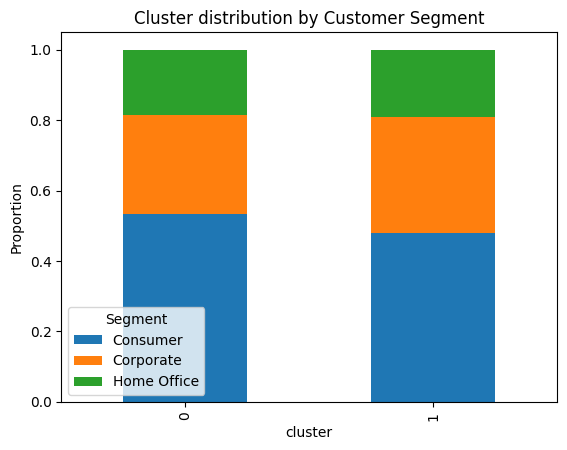

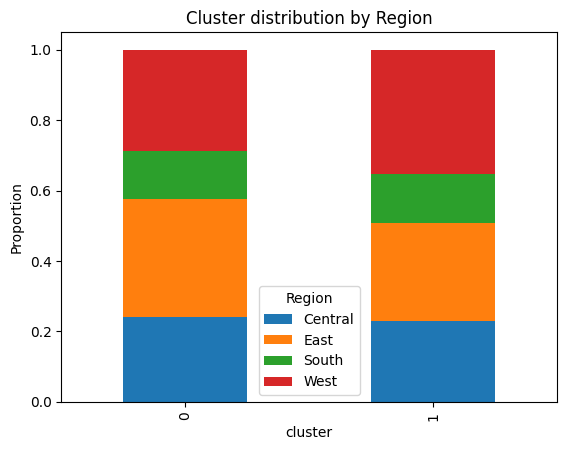

In [60]:
import matplotlib.pyplot as plt

segment_dist.plot(kind="bar", stacked=True)
plt.title("Cluster distribution by Customer Segment")
plt.ylabel("Proportion")
plt.show()

region_dist.plot(kind="bar", stacked=True)
plt.title("Cluster distribution by Region")
plt.ylabel("Proportion")
plt.show()
